<a href="https://colab.research.google.com/github/knickka/Cracked-Walls/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision.models as models
from PIL import Image
from torchvision import transforms
import torch.nn as nn
import torch
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
class Model_resnet(nn.Module):
  def __init__(self):
    super(Model_resnet,self).__init__()
    self.model = models.resnet18(pretrained = True)
    for param in self.model.parameters():
        param.require_grad = False
    for param in self.model.fc.parameters():
        param.require_grad = True
    self.model.fc = nn.Linear(in_features=512,out_features=2)
  def forward(self,x):
    x = self.model(x)
    return x


In [11]:
model = torch.load("/content/drive/MyDrive/saved models/CCD_Model.pth")


In [12]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [ ]:
model.state_dict

In [15]:
model.eval()

Model_resnet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [14]:
def classify(path):
  mean = [0.485, 0.456, 0.406]
  std = [0.229, 0.224, 0.225]


  transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean,std)])

  image = Image.open(path)
  img = image.resize((224,224))
  tr_image = transform(img)
  X = tr_image.reshape(-1,3,224,224)
  y = model(X)
  _,yhat = torch.max(y.data,1)
  if yhat.item() == 1:
    label = "cracked"
  else:
    label = "not cracked"

  plt.imshow(img)
  plt.xlabel(label)
  plt.show()

In [16]:
path = '/content/brina-blum-nqttZgQZFyc-unsplash.jpg'

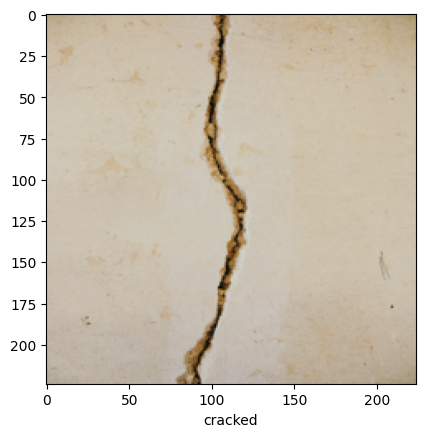

In [17]:
classify(path)